### Phase 3 (Data Preparation)

_TODO: YOUR ANSWER WILL IN THIS DOCUMENT_

In [8]:
import kaggle
import zipfile
import pandas as pd

# jotkut .drop setit kommentoitu pois, koska jouduttu työstää yksilöllisiä soluja, uncomment vaa tulille ja run all cells


file_path = "E:/Koulujutut/AIDA_projekti/aida-projekti-syksy-2024-ryhma-1/docs/us_used_cars/used_cars_data.csv"  
dataframe = pd.read_csv(file_path)

# pudotetaan heti nämä täysin turhat poijes
dataframe.drop(columns=['vin','description','listing_id','main_picture_url','bed','bed_height','bed_length','combine_fuel_economy','is_certified','is_cpo','is_oemcpo','latitude','longitude','vehicle_damage_category'],axis=1,inplace=True)
dataframe.info()

dataframe['back_legroom'] = dataframe['back_legroom'].astype(str)
dataframe['back_legroom'] = dataframe['back_legroom'].apply(lambda x: x.split()[0])
dataframe.head()

C:\Users\watep\AppData\Local\Temp\ipykernel_6096\292768052.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 52 columns):
 #   Column                Dtype  
---  ------                -----  
 0   back_legroom          object 
 1   body_type             object 
 2   cabin                 object 
 3   city                  object 
 4   city_fuel_economy     float64
 5   daysonmarket          int64  
 6   dealer_zip            object 
 7   engine_cylinders      object 
 8   engine_displacement   float64
 9   engine_type           object 
 10  exterior_color        object 
 11  fleet                 object 
 12  frame_damaged         object 
 13  franchise_dealer      bool   
 14  franchise_make        object 
 15  front_legroom         object 
 16  fuel_tank_volume      object 
 17  fuel_type             object 
 18  has_accidents         object 
 19  height                object 
 20  highway_fuel_economy  float64
 21  horsepower            float64
 22  interior_color        object 
 23  isCab  

,back_legroom,body_type,cabin,city,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,35.1,SUV / Crossover,NaN,Bayamon,NaN,522,960,I4,1300.0,I4,...,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,38.1,SUV / Crossover,NaN,San Juan,NaN,207,922,I4,2000.0,I4,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,35.4,Sedan,NaN,Guaynabo,17.0,1233,969,H4,2500.0,H4,...,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,37.6,SUV / Crossover,NaN,San Juan,NaN,196,922,V6,3000.0,V6,...,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,38.1,SUV / Crossover,NaN,San Juan,NaN,137,922,I4,2000.0,I4,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [16]:
'''
- `engine_cylinders` ja `engine_type` sisältää saman tiedon, voi valita toisen encodaa sen ja poistaa toisen.
- `trim_name` ja `trimId` periaatteessa sisältävät samaa tietoa, joten `trimId`-kolumnin voi pudottaa ja `encodaa` `trim_name`.
- `wheel_system` ja `wheel_system_display` sama asia, joten voi valita jomman kumman (esim., `wheel_system_display`) ja `encodaa` tarvittaessa.
- myöskään `engine_cylinders` ei anna hirveän käytettävää dataa
'''

#dataframe.drop(columns=['engine_type', 'trimId', 'wheel_system', 'engine_cylinders'], inplace=True)
dataframe.drop(columns=['engine_cylinders'], inplace=True)


dataframe.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 47 columns):
 #   Column                Dtype  
---  ------                -----  
 0   back_legroom          float64
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   daysonmarket          int64  
 5   dealer_zip            float64
 6   engine_displacement   float64
 7   exterior_color        object 
 8   fleet                 object 
 9   frame_damaged         object 
 10  franchise_dealer      bool   
 11  franchise_make        object 
 12  front_legroom         object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

In [17]:
# muunnellaan objekteja numeeriseksi, kun mahdollista
# ilmeisesti object tyypiset setit voi one-hot encodaa käyttämällä pd.get_dummies() funktiota, ilman että tarvitsee muutta str



dataframe['back_legroom'] = pd.to_numeric(dataframe['back_legroom'], errors='coerce')
#dataframe.drop(columns=['cabin'], inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 47 columns):
 #   Column                Dtype  
---  ------                -----  
 0   back_legroom          float64
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   daysonmarket          int64  
 5   dealer_zip            float64
 6   engine_displacement   float64
 7   exterior_color        object 
 8   fleet                 object 
 9   frame_damaged         object 
 10  franchise_dealer      bool   
 11  franchise_make        object 
 12  front_legroom         object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

In [14]:
dataframe['dealer_zip'] = pd.to_numeric(dataframe['dealer_zip'], errors='coerce')
print(dataframe['dealer_zip'].dtype)


float64


In [18]:
dataframe.head()

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,...,sp_name,theft_title,torque,transmission,transmission_display,trim_name,wheel_system_display,wheelbase,width,year
0,35.1,SUV / Crossover,Bayamon,NaN,522,960.0,1300.0,Solar Yellow,NaN,NaN,...,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,Latitude FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,38.1,SUV / Crossover,San Juan,NaN,207,922.0,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,35.4,Sedan,Guaynabo,17.0,1233,969.0,2500.0,NaN,False,False,...,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,Base,All-Wheel Drive,104.3 in,78.9 in,2016
3,37.6,SUV / Crossover,San Juan,NaN,196,922.0,3000.0,Eiger Gray,NaN,NaN,...,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,V6 HSE AWD,All-Wheel Drive,115 in,87.4 in,2020
4,38.1,SUV / Crossover,San Juan,NaN,137,922.0,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [19]:
# preprosessataan numeriset kolumnit
# front_legroom numeriseksi
dataframe['front_legroom'] = dataframe['front_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['front_legroom'] = pd.to_numeric(dataframe['front_legroom'], errors='coerce')

# fuel_tank_volume numeriseksi
dataframe['fuel_tank_volume'] = dataframe['fuel_tank_volume'].astype(str).apply(lambda x: x.split()[0])
dataframe['fuel_tank_volume'] = pd.to_numeric(dataframe['fuel_tank_volume'], errors='coerce')

# boolenaiksi
dataframe['has_accidents'] = dataframe['has_accidents'].map({'True': True, 'False': False})
#dataframe['has_accidents'] = dataframe['has_accidents'].fillna(False)

dataframe['height'] = dataframe['height'].astype(str).apply(lambda x: x.split()[0])
dataframe['height'] = pd.to_numeric(dataframe['height'], errors='coerce')

# booleaniksi
dataframe['isCab'] = dataframe['isCab'].map({'True': True, 'False': False})
#dataframe['isCab'] = dataframe['isCab'].fillna(False)

# numeriseksi
dataframe['length'] = dataframe['length'].astype(str).apply(lambda x: x.split()[0])
dataframe['length'] = pd.to_numeric(dataframe['length'], errors='coerce')

# muutetaan date datetimeen
dataframe['listed_date'] = pd.to_datetime(dataframe['listed_date'], errors='coerce')

# lisätietoa vuosista päivistä ja kuukausista
dataframe['listed_year'] = dataframe['listed_date'].dt.year
dataframe['listed_month'] = dataframe['listed_date'].dt.month
dataframe['listed_dayofweek'] = dataframe['listed_date'].dt.dayofweek

# numerisesksi
dataframe['maximum_seating'] = dataframe['maximum_seating'].astype(str).apply(lambda x: x.split()[0])
dataframe['maximum_seating'] = pd.to_numeric(dataframe['maximum_seating'], errors='coerce')





In [20]:
# handlataan power 
dataframe['power_hp'] = dataframe['power'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['power_rpm'] = dataframe['power'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['power_hp'] = pd.to_numeric(dataframe['power_hp'], errors='coerce')
dataframe['power_rpm'] = pd.to_numeric(dataframe['power_rpm'], errors='coerce')

dataframe.drop(columns=['power'], inplace=True)


In [22]:
dataframe['salvage'] = dataframe['salvage'].map({'True': True, 'False': False})
#dataframe['salvage'] = dataframe['salvage'].fillna(False) 

# sp_name on hankala, koska niin monta unique arvoa voi joko dropata tai ehkä ryhmitellä top 10 myyjää
# dataframe.drop(columns=['sp_name'], inplace=True)

dataframe['theft_title'] = dataframe['theft_title'].map({'True': True, 'False': False})
#dataframe['theft_title'] = dataframe['theft_title'].fillna(False)

# torque samalla tavallu kun power
dataframe['torque_value'] = dataframe['torque'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['torque_rpm'] = dataframe['torque'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['torque_value'] = pd.to_numeric(dataframe['torque_value'], errors='coerce')
dataframe['torque_rpm'] = pd.to_numeric(dataframe['torque_rpm'], errors='coerce')
dataframe.drop(columns=['torque'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 52 columns):
 #   Column                Dtype         
---  ------                -----         
 0   back_legroom          float64       
 1   body_type             object        
 2   city                  object        
 3   city_fuel_economy     float64       
 4   daysonmarket          int64         
 5   dealer_zip            float64       
 6   engine_displacement   float64       
 7   exterior_color        object        
 8   fleet                 object        
 9   frame_damaged         object        
 10  franchise_dealer      bool          
 11  franchise_make        object        
 12  front_legroom         float64       
 13  fuel_tank_volume      float64       
 14  fuel_type             object        
 15  has_accidents         object        
 16  height                float64       
 17  highway_fuel_economy  float64       
 18  horsepower            float64       
 19  

In [23]:
# wheelbase
dataframe['wheelbase'] = dataframe['wheelbase'].astype(str).apply(lambda x: x.split()[0])
dataframe['wheelbase'] = pd.to_numeric(dataframe['wheelbase'], errors='coerce')

# width
dataframe['width'] = dataframe['width'].astype(str).apply(lambda x: x.split()[0])
dataframe['width'] = pd.to_numeric(dataframe['width'], errors='coerce')



In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 52 columns):
 #   Column                Dtype         
---  ------                -----         
 0   back_legroom          float64       
 1   body_type             object        
 2   city                  object        
 3   city_fuel_economy     float64       
 4   daysonmarket          int64         
 5   dealer_zip            float64       
 6   engine_displacement   float64       
 7   exterior_color        object        
 8   fleet                 object        
 9   frame_damaged         object        
 10  franchise_dealer      bool          
 11  franchise_make        object        
 12  front_legroom         float64       
 13  fuel_tank_volume      float64       
 14  fuel_type             object        
 15  has_accidents         object        
 16  height                float64       
 17  highway_fuel_economy  float64       
 18  horsepower            float64       
 19  

In [38]:
print("Statistical Summary of Numerical Columns:")
dataframe = dataframe.query('year >= 1990')
round(dataframe.select_dtypes(exclude = ['object']).describe() , 2)

Statistical Summary of Numerical Columns:


,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,power_hp,power_rpm,torque_value,torque_rpm
count,2753605.00,2504995.00,2987792.00,2987583.00,2821202.00,2819212.00,2834376.00,2834566.00,2504995.00,2821202.00,...,2834581.00,2834566.00,2987792.00,2987792.00,2987792.00,2987792.00,2512212.00,3927.00,2475855.00,54805.00
mean,37.97,22.70,75.65,50678.31,2966.25,42.20,18.61,65.89,29.48,248.09,...,115.35,78.40,2017.86,2019.92,7.29,3.44,251.51,631.28,265.28,201.00
min,0.00,7.00,0.00,922.00,700.00,0.00,1.90,43.50,11.00,55.00,...,73.50,42.50,2000.00,2010.00,1.00,0.00,55.00,516.00,58.00,200.00
25%,36.00,18.00,14.00,29687.00,2000.00,41.00,14.70,58.10,25.00,175.00,...,106.30,72.40,2017.00,2020.00,7.00,2.00,175.00,600.00,176.00,200.00
50%,38.20,21.00,35.00,48150.00,2500.00,42.00,17.70,66.10,29.00,244.00,...,111.20,77.30,2020.00,2020.00,8.00,3.00,250.00,650.00,258.00,200.00
75%,39.90,26.00,82.00,76706.00,3600.00,43.00,21.10,70.20,33.00,300.00,...,118.90,83.30,2020.00,2020.00,8.00,5.00,310.00,650.00,320.00,200.00
max,53.10,127.00,3573.00,99518.00,8400.00,67.00,64.00,117.60,127.00,1001.00,...,204.50,109.00,2021.00,2020.00,12.00,6.00,949.00,650.00,944.00,400.00
std,3.18,8.81,107.38,27379.01,1348.13,1.51,5.46,7.55,7.77,90.49,...,14.51,7.67,3.50,0.29,2.11,1.66,90.20,27.58,119.70,9.31


In [39]:
cat_cols = dataframe.select_dtypes(include=['object']).columns
for col in cat_cols:
    unique_values = dataframe[col].unique()
    print(f"Total unique values: {len(unique_values)}")
    print("Top 10 most common values:")
    print(dataframe[col].value_counts().head(10))  # Show top 10 most common values
    print("\n")

# joissain näissä paha tehdä encoding unique arvojen määrän takia

Total unique values: 10
Top 10 most common values:
body_type
SUV / Crossover    1414944
Sedan               739636
Pickup Truck        472433
Hatchback            88045
Minivan              79713
Coupe                68528
Van                  46968
Wagon                40378
Convertible          24152
Name: count, dtype: int64


Total unique values: 4683
Top 10 most common values:
city
Houston         43675
San Antonio     24902
Columbus        18285
Miami           17983
Jacksonville    16792
Las Vegas       16325
Tampa           15295
Phoenix         14747
Dallas          14584
Orlando         14450
Name: count, dtype: int64


Total unique values: 27831
Top 10 most common values:
exterior_color
Black                     161282
White                     125127
Summit White               96413
Silver                     78458
Gray                       77302
Oxford White               59072
Blue                       50442
Bright White Clearcoat     43467
Red                        41

In [40]:
cat_cols = dataframe.select_dtypes(include=['object']).columns

# Calculate null counts for each categorical column
null_counts = dataframe[cat_cols].isnull().sum()
print(null_counts)

body_type                 12995
city                          0
exterior_color            49050
fleet                   1426588
frame_damaged           1426588
franchise_make           562514
fuel_type                 78530
has_accidents           2987792
interior_color           380990
isCab                   2987792
listing_color                 0
major_options            192759
make_name                     0
model_name                    0
salvage                 2987792
sp_name                       0
theft_title             2987792
transmission              63122
transmission_display      63122
trim_name                112642
wheel_system_display     141913
dtype: int64


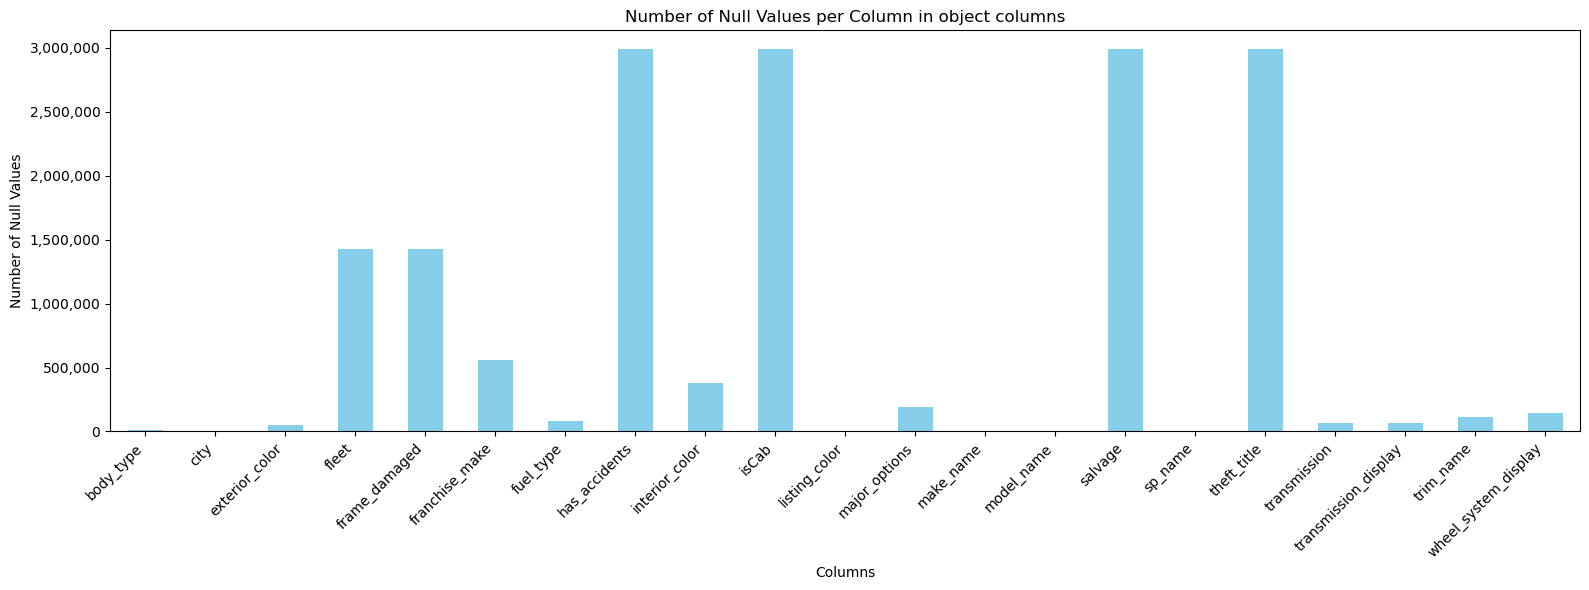

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
null_counts.plot.bar(color='skyblue')
plt.title('Number of Null Values per Column in object columns')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

In [37]:
columns_to_check = ['front_legroom', 'fuel_tank_volume', 'height', 'maximum_seating', 
                    'power_hp', 'power_rpm', 'torque_rpm', 'wheelbase', 'width', 'back_legroom']

for col in columns_to_check:
    count = (dataframe[col] == '--').sum()
    print(f"Column '{col}' has {count} rows with '--'")
    

Column 'front_legroom' has 0 rows with '--'
Column 'fuel_tank_volume' has 0 rows with '--'
Column 'height' has 0 rows with '--'
Column 'maximum_seating' has 0 rows with '--'
Column 'power_hp' has 0 rows with '--'
Column 'power_rpm' has 0 rows with '--'
Column 'torque_rpm' has 0 rows with '--'
Column 'wheelbase' has 0 rows with '--'
Column 'width' has 0 rows with '--'
Column 'back_legroom' has 0 rows with '--'


In [45]:
a =('''
Muutettu objekteista numeeriseksi dataa. Joitakin booliksi meneviä jäänyt objektiksi NaN arvojen takia. Dropattu turhia sarakkeita.
Työstetty date column -> muutama uusi. Jotkut objektit vaativat työstöä encodingina varten. 
''')
print(a)


Muutettu objekteista numeeriseksi dataa. Joitakin booliksi meneviä jäänyt objektiksi NaN arvojen takia. Dropattu turhia sarakkeita.
Työstetty date column -> muutama uusi. Jotkut objektit vaativat työstöä encodingina varten. 

